<a href="https://colab.research.google.com/github/yoo9519-AIdev/Practice_Learning/blob/master/sklearn_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification / Regression

### Classification

In [ ]:
from sklearn import tree

# x가 0, 0이면 0. 1, 1이면 1
x = [[0, 0], [1, 1]]
y = [0, 1]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
clf.predict([[2. ,2.]])

array([1])

In [ ]:
# 비율로 출력이 된다(proba)
clf.predict_proba([[2. ,2.]])

array([[0., 1.]])

#### Iris Dataset

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree

x, y = load_iris(return_X_y=True)

clf = tree.DecisionTreeClassifier() # DecisionTree must be learned by int(Need to encoding, transform)
clf = clf.fit(x, y)

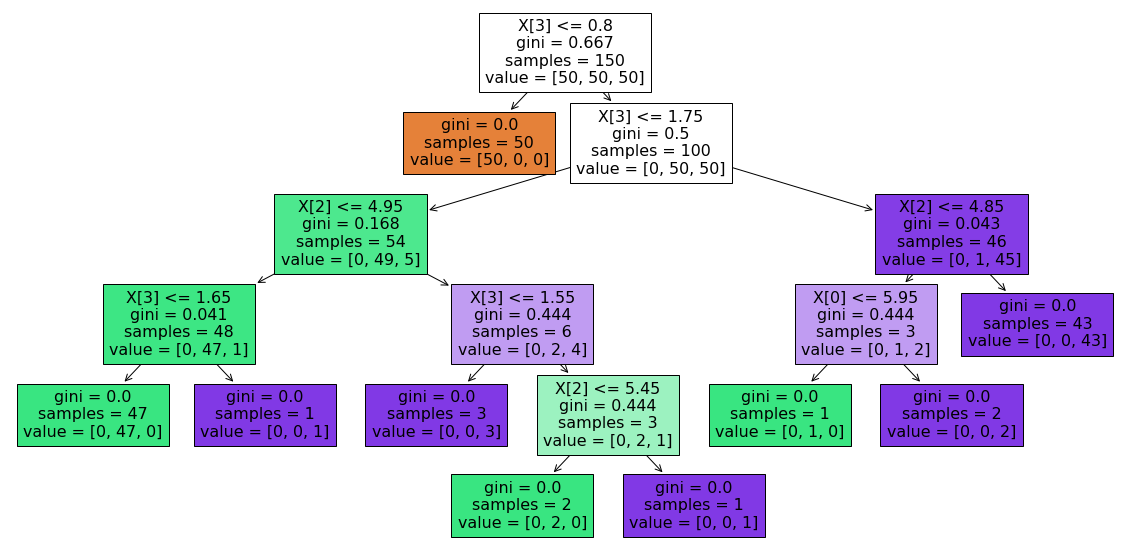

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
t = tree.plot_tree(clf.fit(x, y), filled=True)

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
dot_data

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[3] <= 0.8\\ngini = 0.667\\nsamples = 150\\nvalue = [50, 50, 50]"] ;\n1 [label="gini = 0.0\\nsamples = 50\\nvalue = [50, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[3] <= 1.75\\ngini = 0.5\\nsamples = 100\\nvalue = [0, 50, 50]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="X[2] <= 4.95\\ngini = 0.168\\nsamples = 54\\nvalue = [0, 49, 5]"] ;\n2 -> 3 ;\n4 [label="X[3] <= 1.65\\ngini = 0.041\\nsamples = 48\\nvalue = [0, 47, 1]"] ;\n3 -> 4 ;\n5 [label="gini = 0.0\\nsamples = 47\\nvalue = [0, 47, 0]"] ;\n4 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 1]"] ;\n4 -> 6 ;\n7 [label="X[3] <= 1.55\\ngini = 0.444\\nsamples = 6\\nvalue = [0, 2, 4]"] ;\n3 -> 7 ;\n8 [label="gini = 0.0\\nsamples = 3\\nvalue = [0, 0, 3]"] ;\n7 -> 8 ;\n9 [label="X[2] <= 5.45\\ngini = 0.444\\nsamples = 3\\nvalue = [0, 2, 1]"] ;\n7 -> 9 ;\n10 [label="gini = 0.0\\nsamples = 2\\nvalue = [0,

#### Diabetes Dataset(PimaIndians)
- 미국에 있는 PimaIndians들은 건강했으나, 최근 당뇨병 환자가 급증
- 서구화된 식습관 등 현대문명에 영향이 있을거라 예측
- Kaggle에서 dataset(csv) 제공

데이터 분포 및 개요 확인

In [34]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/Prac/diabetes.csv')
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [37]:
# 정상인 표본

print(data.shape)
asdlfkjalsdfkj = data['Outcome'] == 0
asdlfkjalsdfkj.sum()

# data['Outcome'].sum() <-- 당뇨병 표본(0 or 1 이기 때문에 sum으로 해결 가능)

(768, 9)


500

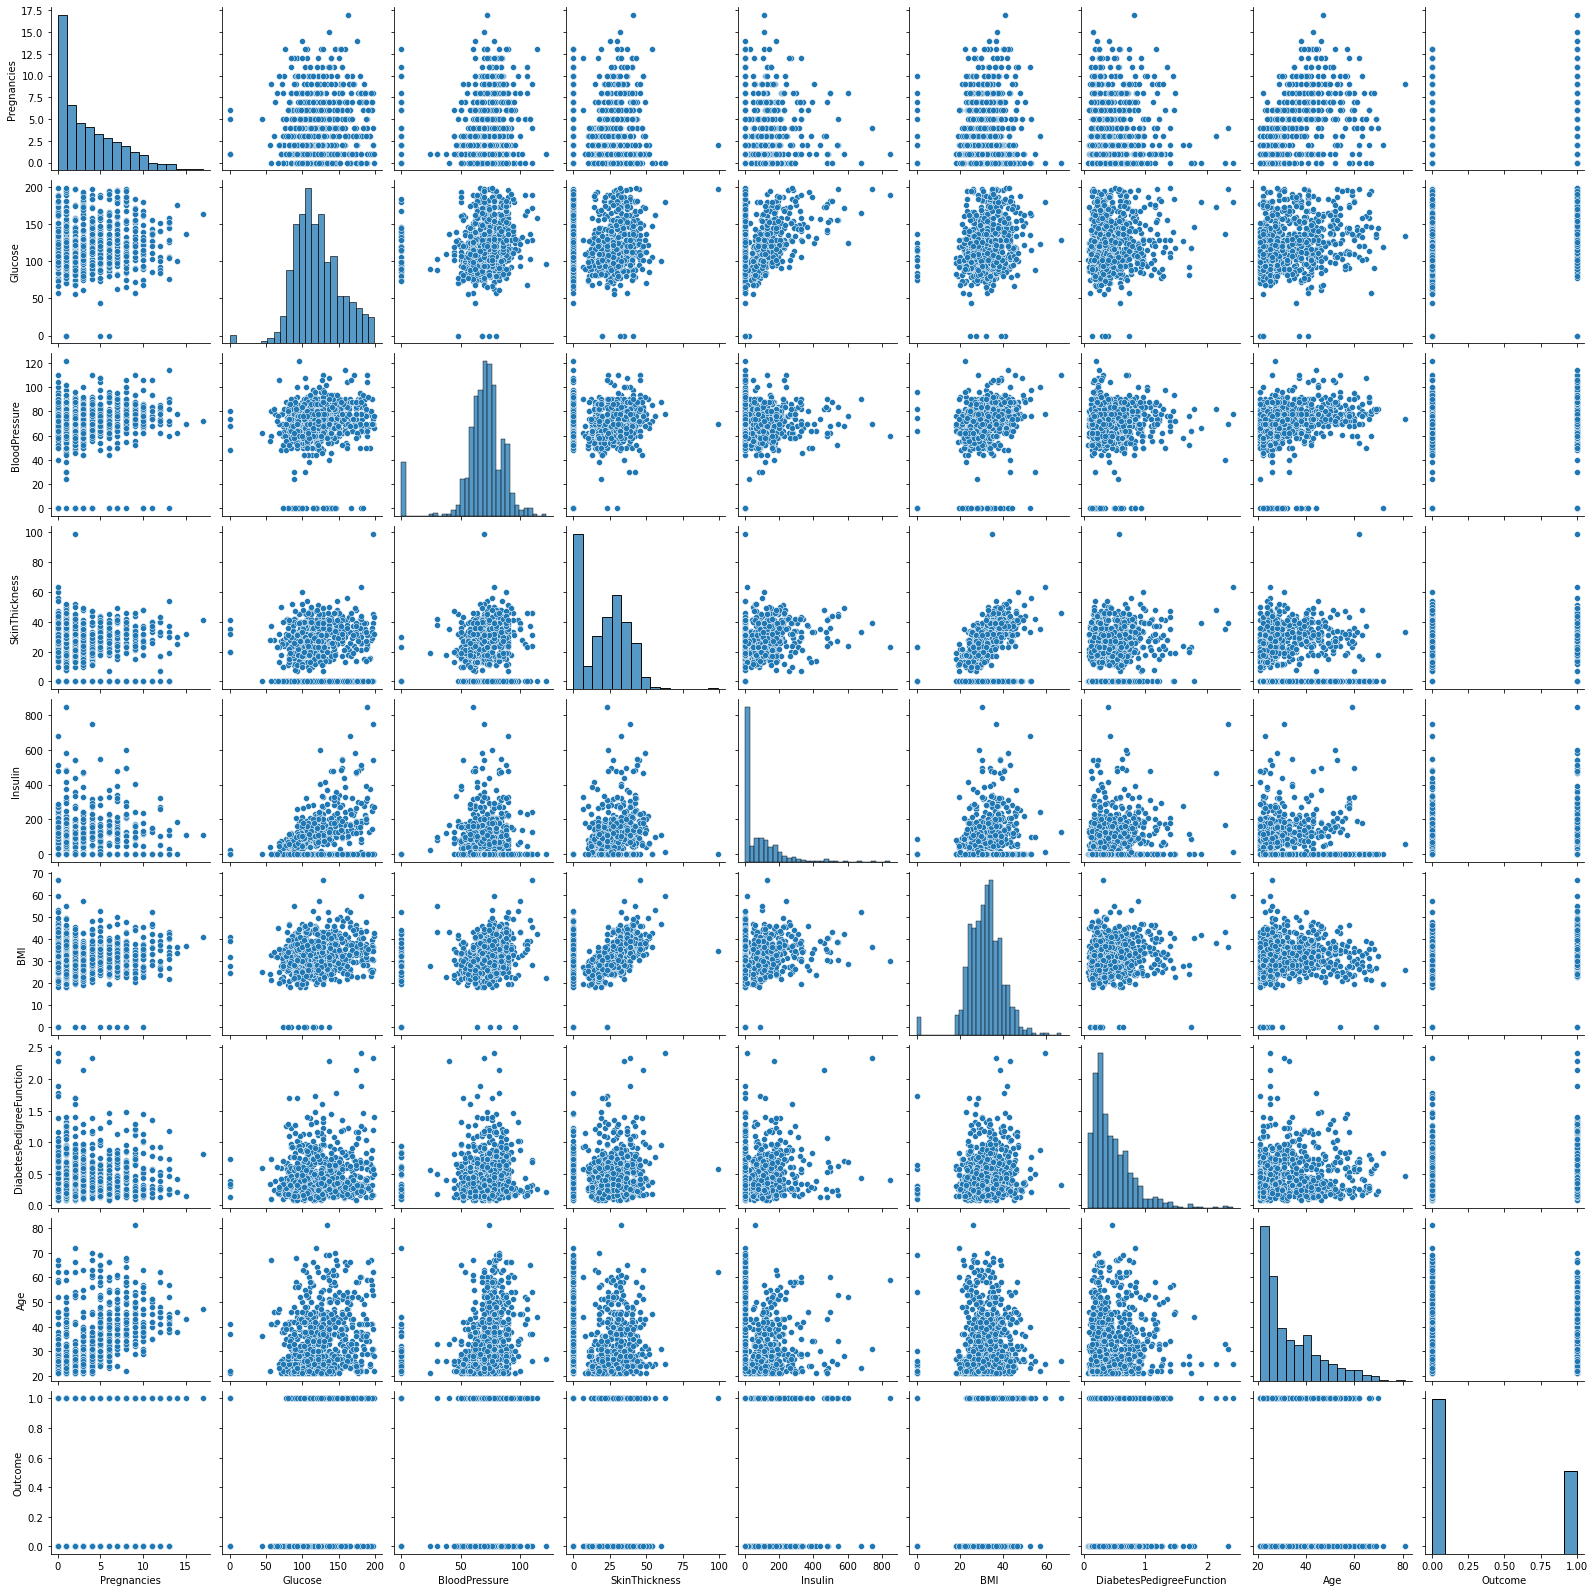

In [ ]:
import seaborn as sns

sns.pairplot(data)

In [38]:
split_count = int(data.shape[0] * 0.8)
split_count

614

In [54]:
train = data[:split_count].copy()
test = data[split_count:].copy()
train.shape, test.shape

((614, 9), (154, 9))

In [63]:
feature_names = train.columns[:-1].tolist()
print(feature_names)
label_name = train.columns[-1]
label_name

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


'Outcome'

In [68]:
x_train = train[feature_names]
print(x_train.shape)
x_train.describe()

(614, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.801303,120.447883,68.522801,20.656352,80.299674,31.890391,0.481179,33.197068
std,3.346191,32.703868,19.608034,15.958168,116.644053,7.975269,0.336866,11.772805
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000
50%,3.000000,116.000000,70.000000,23.000000,37.000000,32.000000,0.386500,29.000000
75%,6.000000,141.000000,80.000000,32.000000,126.000000,36.500000,0.647000,40.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [95]:
# label과 train의 갯수가 일치하는지 확인

x_test = test[feature_names]
print(x_test.shape)
y_train = train[label_name]
print(y_train.shape)
y_test = test[label_name]
y_test

(154, 8)
(614,)


614    1
615    0
616    0
617    0
618    1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 154, dtype: int64

In [79]:
y_test = test[label_name]
print(y_test.shape)
y_test

(154,)


614    1
615    0
616    0
617    0
618    1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 154, dtype: int64

In [76]:
# sklearn.model_selection을 이용하면 저렇게 수동 말고 자동으로도 섞일 수 있다.
# 또한 random으로 seed number대로 무작위셔플 번호를 호출하여 동일하게 섞거나, train/test label을 일정하게 섞을 수도 있다.

from sklearn.model_selection import train_test_split

random_state = 42
train_data, valid_data = train_test_split(data, test_size=0.2, random_state=random_state)
train_data.shape, valid_data.shape

((614, 9), (154, 9))

In [99]:
y_train[:5]

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [81]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [96]:
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_pred[:5]

array([1, 0, 1, 0, 1])

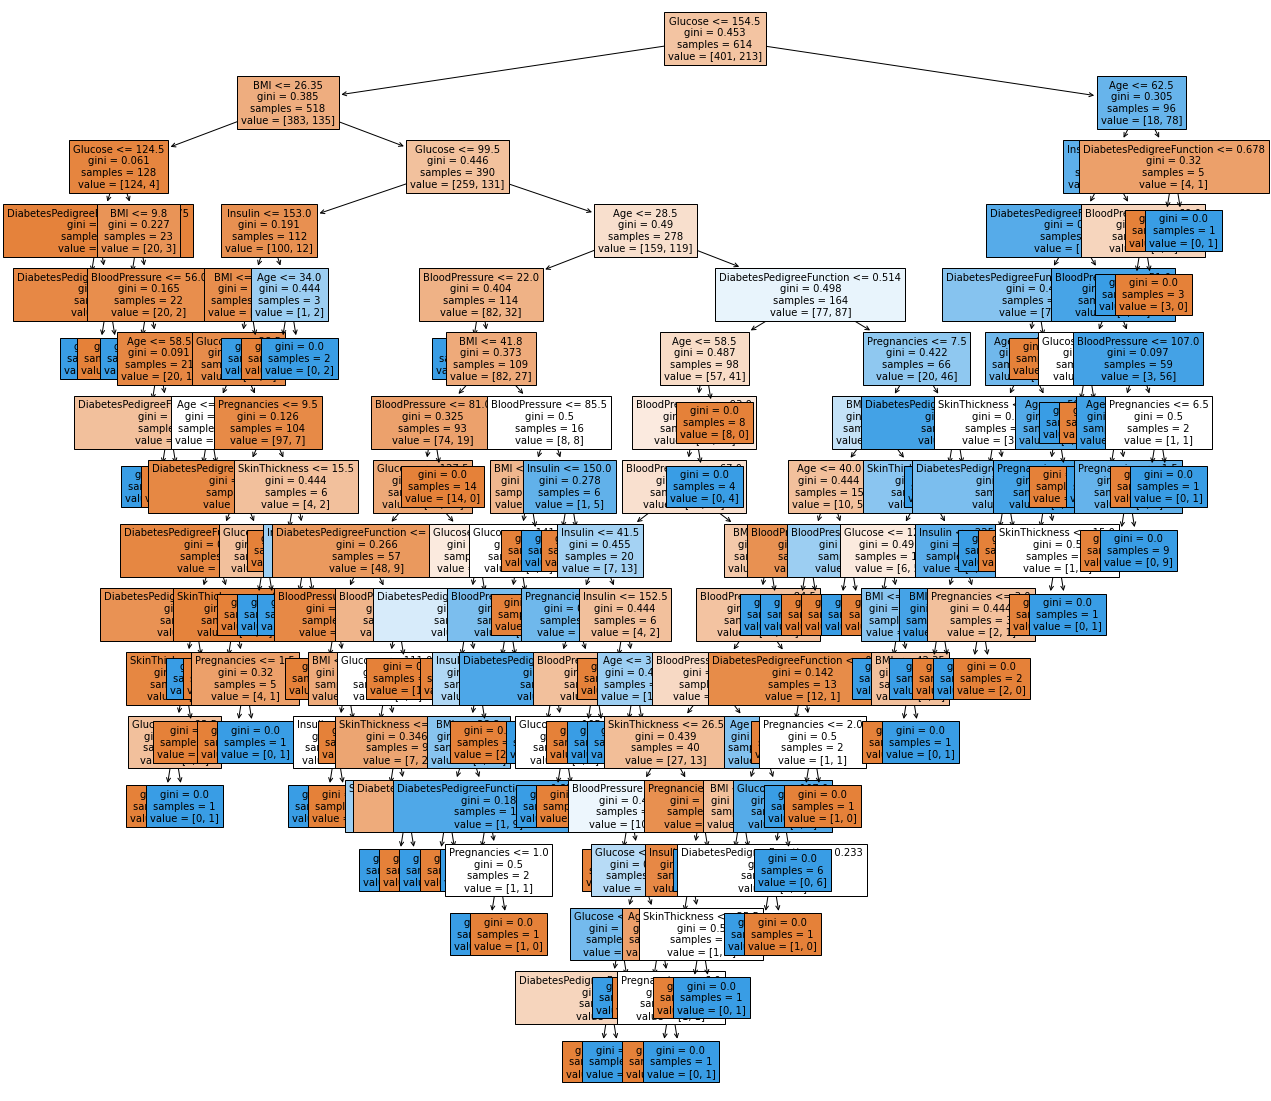

In [103]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
tree = plot_tree(model, feature_names=feature_names,
                 filled=True,
                 fontsize=10)

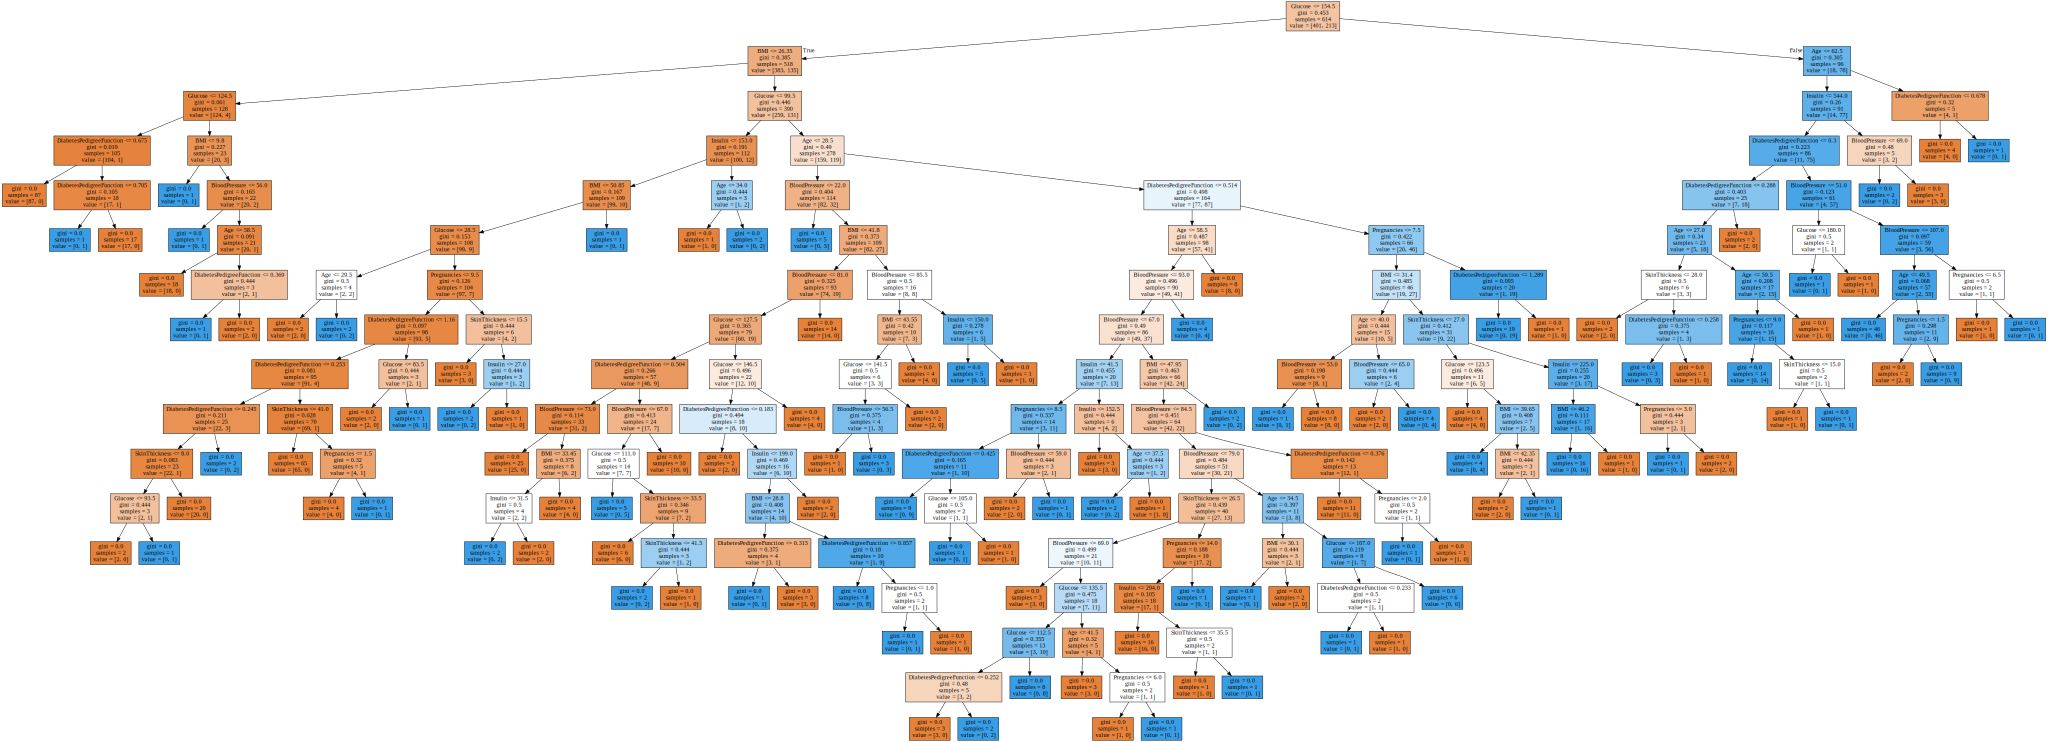

In [107]:
import graphviz
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model, feature_names=feature_names,
                           filled=True)

graphviz.Source(dot_tree)

In [108]:
model.feature_importances_

array([0.06796664, 0.32544771, 0.1353419 , 0.05251307, 0.05983669,
       0.13925345, 0.11800146, 0.10163908])

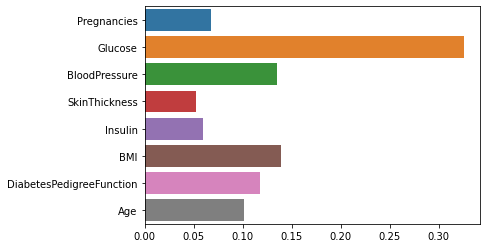

In [109]:
sns.barplot(x=model.feature_importances_, y=feature_names)

In [110]:
diff_count = abs(y_test - y_pred).sum()
diff_count

38

In [111]:
# 오답률(Loss)
abs(y_test - y_pred).sum() / len(y_test)

0.24675324675324675

In [112]:
# 정확도(Accuracy)
(len(y_test) - diff_count) / len(y_test) * 100

75.32467532467533

In [115]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))
model.score(x_test, y_test) * 100

0.7532467532467533


75.32467532467533